# Anomaly detection

First, load the scikit-learn package:

In [1]:
import sklearn

Filter warnings and import matplotlib

In [2]:
# add plot inline in the page
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['font.size'] = 16

import warnings  # Hide all warnings here
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading digits dataset

scikit-learn gives simple access to [public datasets](http://scikit-learn.org/stable/datasets/index.html)

In [3]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)   # contains 1797 images of 64 pixels
print(y.shape)
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


Let's look at some images

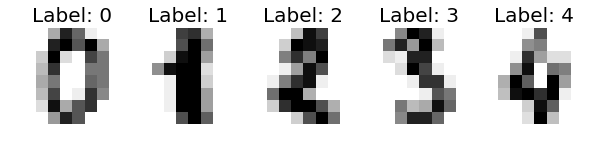

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, (i, x) in zip(axes, enumerate(X[:5])):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % y[i], fontsize=20)
    ax.axis('off')

### Unsupervised anomaly detection

**Objective:** Identify the digits that look "different"

**Assumption:** anomalies are very rare

In [5]:
X_5 = X[y == 5]  # focus on the 5s

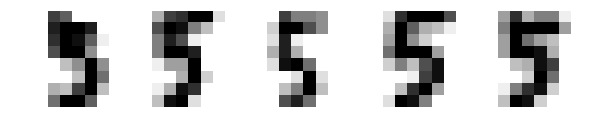

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, x in zip(axes, X_5[:5]):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')

### Use Isolation Forest

In [7]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.05)
iforest = iforest.fit(X_5)

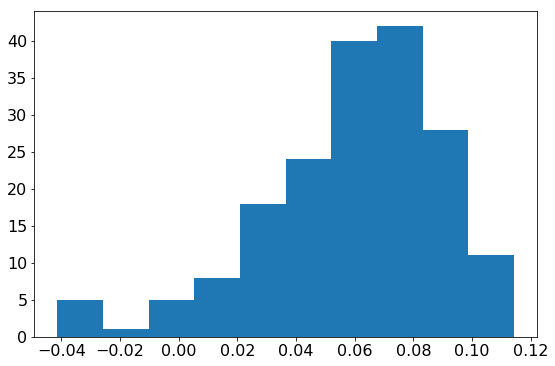

In [8]:
abnormality_score = iforest.decision_function(X_5)
plt.hist(abnormality_score);  # anomaly = low score

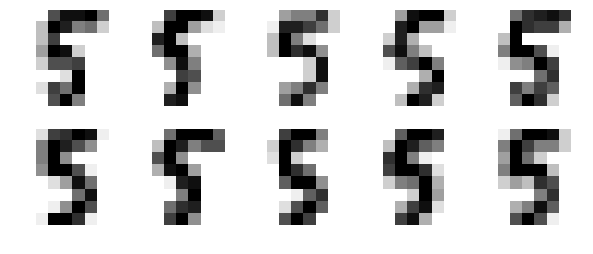

In [9]:
X_strong_inliers = X_5[np.argsort(abnormality_score)[-10:]]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in zip(range(len(X_strong_inliers)), axes.ravel()):
    ax.imshow(X_strong_inliers[i].reshape((8, 8)),
               cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')

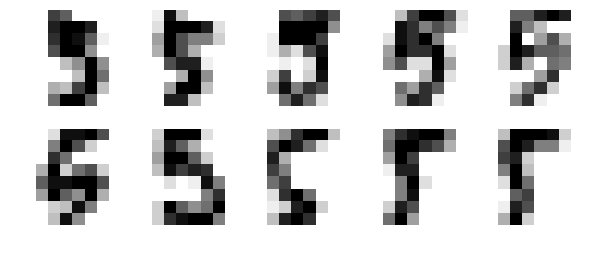

In [10]:
X_outliers = X_5[iforest.predict(X_5) == -1]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in zip(range(len(X_outliers)), axes.ravel()):
    ax.imshow(X_outliers[i].reshape((8, 8)),
               cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')